<a href="https://colab.research.google.com/github/luismael15/DeFi_Research/blob/main/Lido_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [198]:
# Load the dataset
file_path = '/lido.csv'
df = pd.read_csv(file_path, header=None, sep=',', on_bad_lines='warn', engine='python')

In [199]:
# Remove columns where all values are NaN
df.dropna(axis=1, how="all", inplace=True)

# Remove rows where all values are NaN
df.dropna(axis=0, how="all", inplace=True)

# Drop row 1
df.drop(index=df.index[1], inplace=True)

In [200]:
# Combine rows 0, 2, 3, and 4 to create a new header
new_header = df.iloc[[0, 1, 2, 3]].astype(str).apply(lambda x: " ".join(x), axis=0)

# Remove old header rows from the dataset
df = df.iloc[5:].reset_index(drop=True)  # Keep data starting from row 5

# Set the new header
df.columns = new_header

In [201]:
# Replace NaN values in the header with an empty string
df.columns = df.columns.map(lambda x: x.replace("nan", "").strip() if isinstance(x, str) else x)

In [202]:
# Basic dataset info
print("\n🔍 Data Overview:")
print(df.info())


🔍 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                1549 non-null   object
 1   Timestamp                           1549 non-null   object
 2   Lido terra TVL                      1549 non-null   object
 3   Lido ethereum TVL                   1549 non-null   object
 4   Lido moonriver TVL                  1111 non-null   object
 5   Lido moonbeam TVL                   972 non-null    object
 6   Lido solana TVL                     1279 non-null   object
 7   Lido Total TVL                      1549 non-null   object
 8   Lido terra Tokens(USD) terra-luna   820 non-null    object
 9   Lido ethereum Tokens(USD) ethereum  151 non-null    object
 10  Lido ethereum Tokens(USD) WETH      1397 non-null   object
 11  Lido ethereum Tokens(USD) MATIC     11

In [203]:
for col in df.columns[1:36]:  # Note: Upper bound is exclusive, so use 36
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [204]:
print("\n📊 Summary Statistics:")
print(df.describe())


📊 Summary Statistics:
          Timestamp  Lido terra TVL  Lido ethereum TVL  Lido moonriver TVL  \
count  1.549000e+03    1.549000e+03       1.549000e+03        1.111000e+03   
mean   1.675382e+09    8.538024e+08       1.360967e+10        1.111592e+06   
std    3.864690e+07    1.942365e+09       1.105384e+10        1.262617e+06   
min    1.608509e+09    0.000000e+00       2.697598e+06        3.858058e+04   
25%    1.641946e+09    0.000000e+00       5.589329e+09        8.594585e+04   
50%    1.675382e+09    7.864888e+03       9.779548e+09        2.592736e+05   
75%    1.708819e+09    3.710797e+08       2.304649e+10        2.224857e+06   
max    1.742256e+09    9.661729e+09       4.014349e+10        4.343811e+06   

       Lido moonbeam TVL  Lido solana TVL  Lido Total TVL  \
count       9.720000e+02     1.279000e+03    1.549000e+03   
mean        4.715430e+06     8.204089e+07    1.453506e+10   
std         6.382727e+06     8.299987e+07    1.066959e+10   
min         1.235551e+05     7

In [205]:
# Count missing values in each column
print("\n❓ Missing Values Per Column:")
print(df.isnull().sum())


❓ Missing Values Per Column:
Date                                     0
Timestamp                                0
Lido terra TVL                           0
Lido ethereum TVL                        0
Lido moonriver TVL                     438
Lido moonbeam TVL                      577
Lido solana TVL                        270
Lido Total TVL                           0
Lido terra Tokens(USD) terra-luna      729
Lido ethereum Tokens(USD) ethereum    1398
Lido ethereum Tokens(USD) WETH         152
Lido ethereum Tokens(USD) MATIC        438
Lido moonriver Tokens(USD) kusama      438
Lido moonbeam Tokens(USD) polkadot     577
Lido solana Tokens(USD) solana         270
Lido Total Tokens(USD) ethereum       1393
Lido Total Tokens(USD) terra-luna      729
Lido Total Tokens(USD) WETH            157
Lido Total Tokens(USD) solana          270
Lido Total Tokens(USD) kusama          438
Lido Total Tokens(USD) MATIC           438
Lido Total Tokens(USD) polkadot        577
Lido terra Tokens terra-

In [206]:
# Check the time range of the dataset
print("\n📅 Date Range:")
print(f"From {df.index.min()} to {df.index.max()}")


📅 Date Range:
From 0 to 1548


In [207]:
df.fillna(0, inplace=True)


In [208]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df.set_index('Date', inplace=True)  # Set date as index for time-series analysis


In [210]:
# Select relevant columns
columns = ['Lido Total TVL', 'Lido ethereum TVL', 'Lido terra TVL',
           'Lido moonriver TVL', 'Lido moonbeam TVL', 'Lido solana TVL']
df_lido = df[columns].copy()


# Convert TVL values to Billions or Millions
def format_tvl(value):
    if value >= 1e9:
        return f"{value / 1e9:.2f}B"  # Convert to Billions (B)
    elif value >= 1e6:
        return f"{value / 1e6:.2f}M"  # Convert to Millions (M)
    else:
        return f"{value:.2f}"  # Keep raw format if < 1M

# Apply formatting to hover data columns using a different name prefix
for col in columns[1:]:  # Exclude 'Lido Total TVL' from formatting
    df_lido[f'{col} Formatted'] = df_lido[col].apply(format_tvl)

# Create an interactive line plot
fig = px.line(df_lido,  # Use the original df_lido for the main plot
              x=df_lido.index,
              y="Lido Total TVL",
              hover_data={
                  "Lido ethereum TVL": False,  # Hide original column from hover
                  "Lido terra TVL": False,      # Hide original column from hover
                  "Lido moonriver TVL": False, # Hide original column from hover
                  "Lido moonbeam TVL": False,  # Hide original column from hover
                  "Lido solana TVL": False,    # Hide original column from hover
                  "Lido ethereum TVL Formatted": True,  # Show formatted column
                  "Lido terra TVL Formatted": True,      # Show formatted column
                  "Lido moonriver TVL Formatted": True, # Show formatted column
                  "Lido moonbeam TVL Formatted": True,  # Show formatted column
                  "Lido solana TVL Formatted": True     # Show formatted column
              },
              title="Lido Total TVL with Chain Breakdown on Hover",
              labels={"value": "TVL (USD)", "date": "Date"})

# Show interactive plot
fig.show()

Top 10 Inflow Days:
          Date  Inflow (Billions)  % Change
706 2024-05-21               5.39     18.79
807 2024-11-28               3.38     10.37
675 2024-03-21               3.31     10.57
795 2024-11-07               2.99     12.60
804 2024-11-22               2.93      9.73
854 2025-03-03               2.73     13.04
280 2022-03-01               2.65     23.68
685 2024-04-09               2.64      8.08
668 2024-03-05               2.31      6.68
748 2024-08-09               2.25      9.75

Top 10 Outflow Days:
          Date  Outflow (Billions)  % Change
185 2022-05-10                3.73    -23.21
678 2025-03-04                3.33    -14.11
509 2024-03-20                3.24     -9.38
672 2025-02-25                3.09    -11.59
661 2025-02-03                2.95     -9.94
576 2024-08-06                2.94    -10.93
633 2024-12-10                2.93     -7.43
647 2025-01-08                2.92     -8.20
523 2024-04-14                2.77     -9.12
522 2024-04-13          

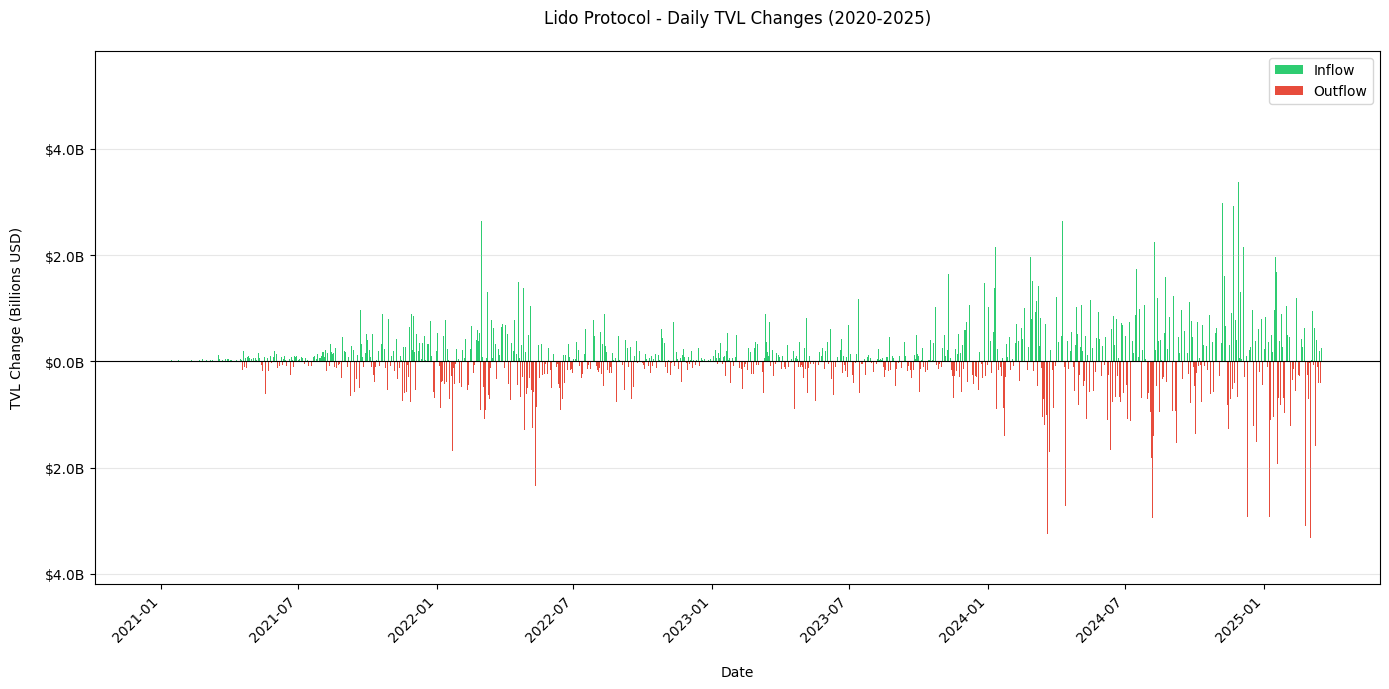

In [211]:
# Calculate daily changes
df['Change'] = df['Lido Total TVL'].diff()

# Remove first row with NaN
df = df.iloc[1:].copy()  # Use copy() to avoid SettingWithCopyWarning

# Calculate percentage change against previous day's TVL
df['% Change'] = (df['Change'] / df['Lido Total TVL'].shift(1) * 100).round(2)

# Filter and process inflows
inflow_days = df[df['Change'] > 0].copy()
inflow_days['Inflow (Billions)'] = (inflow_days['Change'] / 1e9).round(2)

# Filter and process outflows
outflow_days = df[df['Change'] < 0].copy()
outflow_days['Outflow (Billions)'] = (abs(outflow_days['Change']) / 1e9).round(2)

# Print formatted tables
print("Top 10 Inflow Days:")
# Reset index before selecting columns to include 'Date'
top_inflow = inflow_days.reset_index().nlargest(10, 'Change')[['Date', 'Inflow (Billions)', '% Change']]
print(top_inflow)

print("\nTop 10 Outflow Days:")
# Reset index before selecting columns to include 'Date'
top_outflow = outflow_days.reset_index().nsmallest(10, 'Change')[['Date', 'Outflow (Billions)', '% Change']]
print(top_outflow)


# Create combined visualization
plt.figure(figsize=(14, 7))

# Plot inflows (positive values)
plt.bar(inflow_days.index,  # Use index for x-axis (it's already 'Date')
        inflow_days['Inflow (Billions)'],
        color='#2ecc71',
        label='Inflow')

# Plot outflows (negative values)
plt.bar(outflow_days.index,  # Use index for x-axis (it's already 'Date')
        -outflow_days['Outflow (Billions)'],
        color='#e74c3c',
        label='Outflow')

plt.title('Lido Protocol - Daily TVL Changes (2020-2025)', pad=20)
plt.xlabel('Date', labelpad=15)
plt.ylabel('TVL Change (Billions USD)', labelpad=15)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Format y-axis labels with absolute values
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${abs(x):.1f}B'))

plt.tight_layout()
plt.show()